# Plot-cars Lab

## Overview

Get familiar with plot functions

## Depends On
None

## Run time
15-20 mins

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

### Cars Dataset

The "cars" dataset has speed and stopping distance of different cars. Each line is a different observation.

In [2]:
import os
import urllib.request

data_location = '../data/cars93.csv'
data_url = 'https://raw.githubusercontent.com/elephantscale/datasets/master/cars/cars93.csv'

if not os.path.exists (data_location):
    data_location = os.path.basename(data_location)
    if not os.path.exists(data_location):
        print("Downloading : ", data_url)
        urllib.request.urlretrieve(data_url, data_location)
print('data_location:', data_location)


data_location: ../data/cars93.csv


In [3]:
cars = pd.read_csv(data_location)
cars

,Unnamed: 0,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,...,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make
0,1,Acura,Integra,Small,12.9,15.9,18.8,25,31,NaN,...,5,177,102,68,37,26.5,11.0,2705,non-USA,Acura Integra
1,2,Acura,Legend,Midsize,29.2,33.9,38.7,18,25,Driver & Passenger,...,5,195,115,71,38,30.0,15.0,3560,non-USA,Acura Legend
2,3,Audi,90,Compact,25.9,29.1,32.3,20,26,Driver only,...,5,180,102,67,37,28.0,14.0,3375,non-USA,Audi 90
3,4,Audi,100,Midsize,30.8,37.7,44.6,19,26,Driver & Passenger,...,6,193,106,70,37,31.0,17.0,3405,non-USA,Audi 100
4,5,BMW,535i,Midsize,23.7,30.0,36.2,22,30,Driver only,...,4,186,109,69,39,27.0,13.0,3640,non-USA,BMW 535i
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,89,Volkswagen,Eurovan,Van,16.6,19.7,22.7,17,21,NaN,...,7,187,115,72,38,34.0,NaN,3960,non-USA,Volkswagen Eurovan
89,90,Volkswagen,Passat,Compact,17.6,20.0,22.4,21,30,NaN,...,5,180,103,67,35,31.5,14.0,2985,non-USA,Volkswagen Passat
90,91,Volkswagen,Corrado,Sporty,22.9,23.3,23.7,18,25,NaN,...,4,159,97,66,36,26.0,15.0,2810,non-USA,Volkswagen Corrado
91,92,Volvo,240,Compact,21.8,22.7,23.5,21,28,Driver only,...,5,190,104,67,37,29.5,14.0,2985,non-USA,Volvo 240


In [4]:
cars['MPG.avg'] = (cars['MPG.city'] + cars['MPG.highway']) / 2

## Calculate avg MPG for each type
mpg = cars.groupby('Type').agg({'MPG.avg': 'mean'}) 
mpg = mpg.reset_index('Type')
mpg

,Type,MPG.avg
0,Compact,26.281250
1,Large,22.545455
2,Midsize,23.136364
3,Small,32.666667
4,Sporty,25.285714
5,Van,19.444444



**=> Do a matplotlib barplot on car Type vs average mileage.**

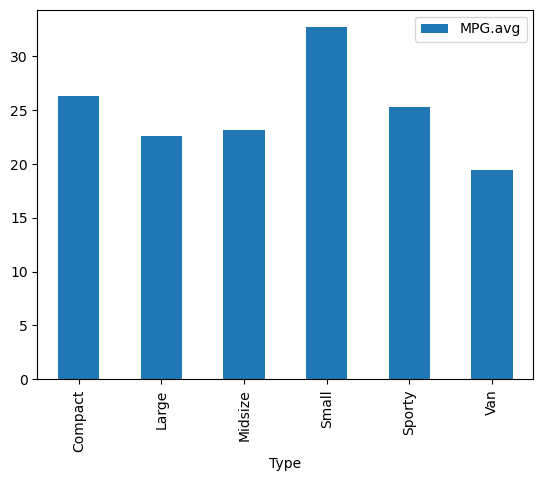

In [5]:
# This is the built in plot in Pandas

mpg.plot.bar(x='Type')
plt.show()

<Axes: xlabel='Type', ylabel='MPG.avg'>

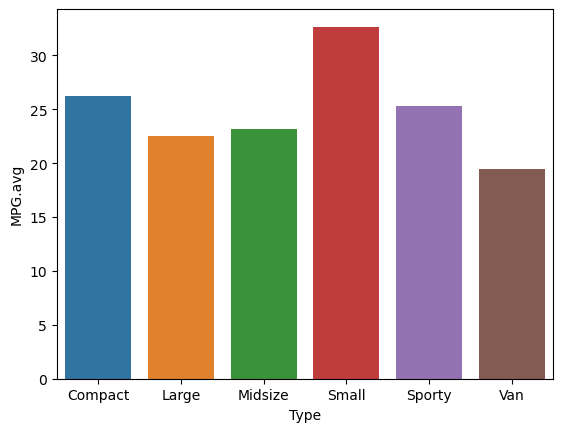

In [6]:
## Let's pretty it up with seaborn

sns.barplot(data=mpg, x='Type', y='MPG.avg')


## Boxplot
**=> BoxPlot  Car type vs MPG.**


<Axes: title={'center': 'MPG.avg'}, xlabel='[Type]'>

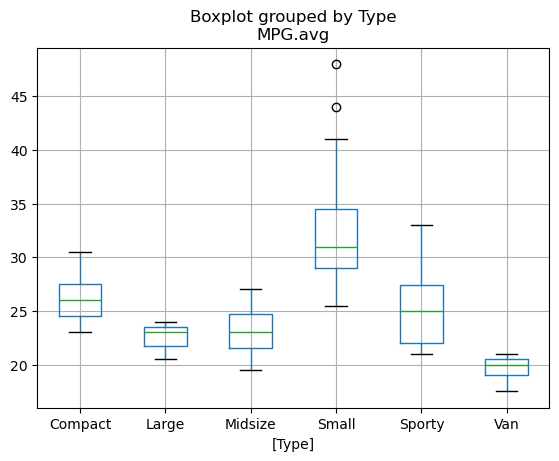

In [7]:
# built in plot in pandas

cars[['Type', 'MPG.avg']].boxplot(by='Type')

<Axes: xlabel='Type', ylabel='MPG.avg'>

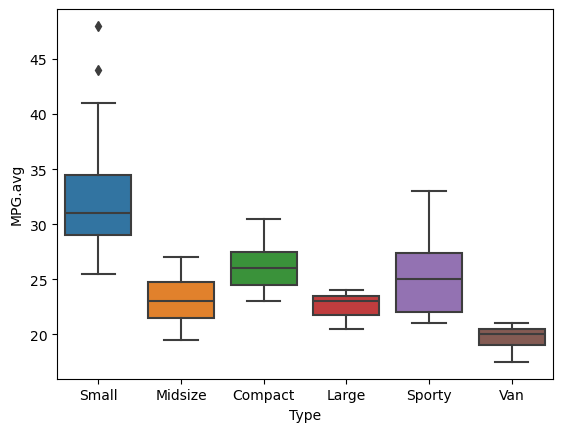

In [8]:
# sns pretty graphs
sns.boxplot(data=cars, x='Type', y='MPG.avg')

### Histograms

**=> Do a histogram on car prices.**



array([[<Axes: title={'center': 'Price'}>]], dtype=object)

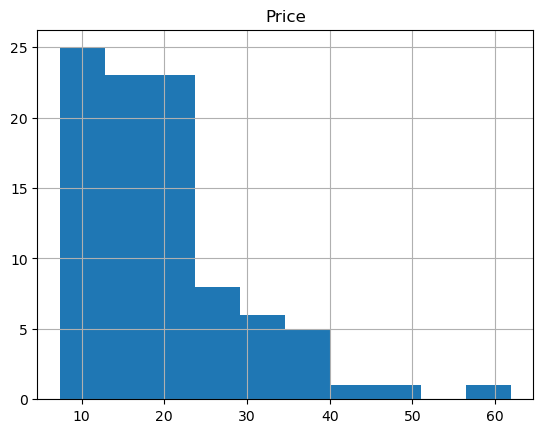

In [9]:
cars[['Type', 'Price']].hist()

/home/mark/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Price', ylabel='Count'>

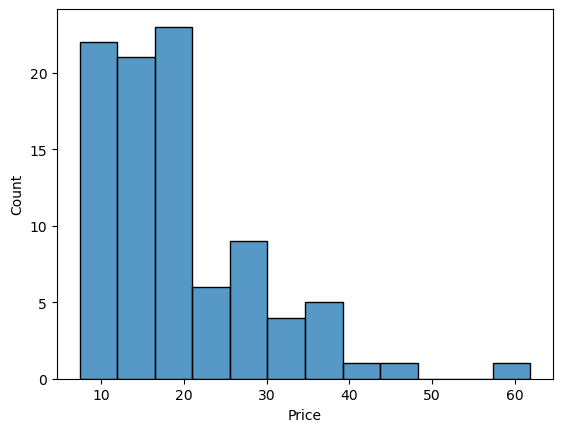

In [10]:
sns.histplot(data=cars, x='Price')

/home/mark/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/mark/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Type', ylabel='Price'>

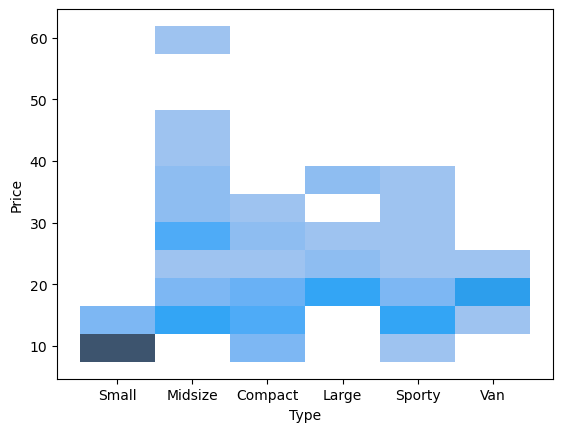

In [11]:
# price per car type
sns.histplot(data=cars, x='Type', y='Price')


### Save Graphs
And finally export a graph into a file (pdf or png)

you can use plt.savefig()


/home/mark/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


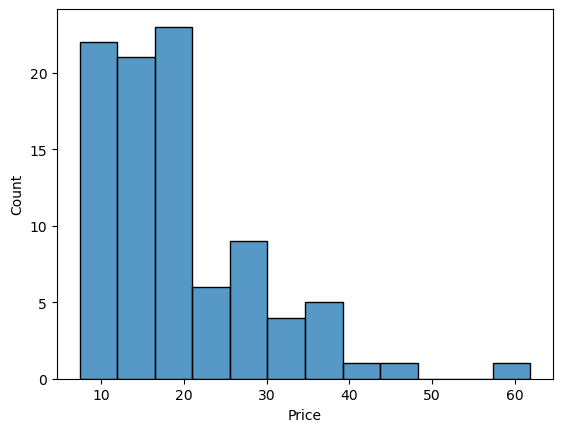

In [12]:
sns.histplot(data=cars, x='Price')
plt.savefig('plot.png')